In [2]:
%matplotlib inline


In [3]:
import seaborn as sns
import pandas as pd
import sys
import glob
import matplotlib.patches as mpatches
import math


bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-scaling-all/flickr-scaling-all.csv"
policy_labels = {'constant:0': 'Convolve via Loops', 'constant:1': 'Convolve via Matrix Multiply',
                 'constant:2': 'Convolve via FFT', 'oracle:min': 'Oracle'}

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from seaborn.palettes import _ColorPalette

def matplotlib_palette(name='viridis', n_colors=6,
                      light=.85, dark=.15, reverse=False, as_cmap=False):
    """Make a sequential palette from the cubehelix system.
    This produces a colormap with linearly-decreasing (or increasing)
    brightness. That means that information will be preserved if printed to
    black and white or viewed by someone who is colorblind.  "cubehelix" is
    also available as a matplotlib-based palette, but this function gives the
    user more control over the look of the palette and has a different set of
    defaults.
    Parameters
    ----------
    n_colors : int
        Number of colors in the palette.
    start : float, 0 <= start <= 3
        The hue at the start of the helix.
    rot : float
        Rotations around the hue wheel over the range of the palette.
    gamma : float 0 <= gamma
        Gamma factor to emphasize darker (gamma < 1) or lighter (gamma > 1)
        colors.
    hue : float, 0 <= hue <= 1
        Saturation of the colors.
    dark : float 0 <= dark <= 1
        Intensity of the darkest color in the palette.
    light : float 0 <= light <= 1
        Intensity of the lightest color in the palette.
    reverse : bool
        If True, the palette will go from dark to light.
    as_cmap : bool
        If True, return a matplotlib colormap instead of a list of colors.
    Returns
    -------
    palette or cmap : seaborn color palette or matplotlib colormap
        List-like object of colors as RGB tuples, or colormap object that
        can map continuous values to colors, depending on the value of the
        ``as_cmap`` parameter.
    See Also
    --------
    choose_cubehelix_palette : Launch an interactive widget to select cubehelix
                               palette parameters.
    dark_palette : Create a sequential palette with dark low values.
    light_palette : Create a sequential palette with bright low values.
    References
    ----------
    Green, D. A. (2011). "A colour scheme for the display of astronomical
    intensity images". Bulletin of the Astromical Society of India, Vol. 39,
    p. 289-295.
    Examples
    --------
    Generate the default palette:
    .. plot::
        :context: close-figs
        >>> import seaborn as sns; sns.set()
        >>> sns.palplot(sns.cubehelix_palette())
    Rotate backwards from the same starting location:
    .. plot::
        :context: close-figs
        >>> sns.palplot(sns.cubehelix_palette(rot=-.4))
    Use a different starting point and shorter rotation:
    .. plot::
        :context: close-figs
        >>> sns.palplot(sns.cubehelix_palette(start=2.8, rot=.1))
    Reverse the direction of the lightness ramp:
    .. plot::
        :context: close-figs
        >>> sns.palplot(sns.cubehelix_palette(reverse=True))
    Generate a colormap object:
    .. plot::
        :context: close-figs
        >>> from numpy import arange
        >>> x = arange(25).reshape(5, 5)
        >>> cmap = sns.cubehelix_palette(as_cmap=True)
        >>> ax = sns.heatmap(x, cmap=cmap)
    Use the full lightness range:
    .. plot::
        :context: close-figs
        >>> cmap = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)
        >>> ax = sns.heatmap(x, cmap=cmap)
    """
    #cdict = mpl._cm.cubehelix(gamma, start, rot, hue)
    cmap = plt.get_cmap(name) #mpl.colors.LinearSegmentedColormap(name, cdict)

    x = np.linspace(light, dark, n_colors)
    pal = cmap(x)[:, :3].tolist()
    if reverse:
        pal = pal[::-1]

    if as_cmap:
        x_256 = np.linspace(light, dark, 256)
        if reverse:
            x_256 = x_256[::-1]
        pal_256 = cmap(x_256)
        cmap = mpl.colors.ListedColormap(pal_256)
        return cmap
    else:
        return _ColorPalette(pal)

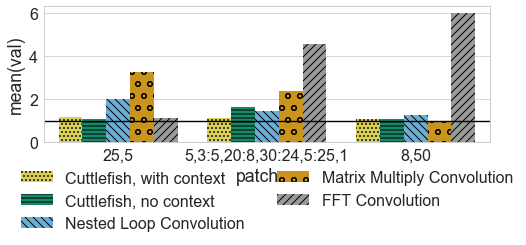

In [304]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)



df = bandit_rewards.copy()
df = df[df['globalTime'] > 0]
df = df[df['numParts'] == 8*4]
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)

df =  df[['patches', 'policy2', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['patches', 'globalTime']].groupby('patches').transform('min')
df['val'] = df['globalTime'] / df['oracle']
df = df[df['policy2'].isin(['constant:0,False', 'constant:1,False', 'constant:2,False','gaussian-thompson-sampling:1.0,False', 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0,False'])]

names = {'constant:0,False': 'Nested Loop Convolution', 'constant:1,False': 'Matrix Multiply Convolution', 'constant:2,False': 'FFT Convolution','gaussian-thompson-sampling:1.0,False': 'Cuttlefish, no context', 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0,False': 'Cuttlefish, with context'}
name_order = ['Cuttlefish, with context', 'Cuttlefish, no context', 'Nested Loop Convolution', 'Matrix Multiply Convolution', 'FFT Convolution']

df = df.replace({'policy2': names})
#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(8, 2.5))

sns.barplot(data=df, x='patches', hue='policy2', hue_order=name_order, y='val', ax=ax)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['patches'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)


ax.hlines([1.0], -1000, 1000)

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
leg = ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)

#df.plot.bar()
#plt.show()
plt.savefig('flickr_8node.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()


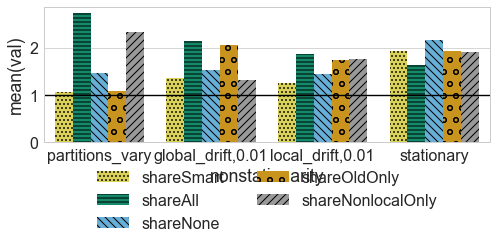

,nonstationarity,policy,policy2,tag,clusterCoefficient,globalTime,oracle,val
24275,partitions_vary,gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareSmart,1.0",shareSmart,1.000000e+00,230385,215055,1.071284
129462,"global_drift,0.01",gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareSmart,1.0",shareSmart,1.000000e+00,639623,470534,1.359356
258922,"local_drift,0.01",gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareSmart,1.0",shareSmart,1.000000e+00,677609,540786,1.253008
388382,stationary,gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareSmart,1.0",shareSmart,1.000000e+00,807358,420328,1.920781
5930931,partitions_vary,gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareAll,100000...",shareAll,1.000000e+10,586946,215055,2.729283
5939023,partitions_vary,gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareNone,10000...",shareNone,1.000000e+10,315265,215055,1.465974
5947115,partitions_vary,gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareOldOnly,10...",shareOldOnly,1.000000e+10,232566,215055,1.081426
5955207,partitions_vary,gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareNonlocalOn...",shareNonlocalOnly,1.000000e+10,501314,215055,2.331097
5987572,"global_drift,0.01",gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareAll,100000...",shareAll,1.000000e+10,1002167,470534,2.129850
6019937,"local_drift,0.01",gaussian-thompson-sampling:1.0,"gaussian-thompson-sampling:1.0,shareAll,100000...",shareAll,1.000000e+10,1006684,540786,1.861520


In [313]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)



bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary-context/flickr-nonstationary-all.csv"
## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards

df = df[df['globalTime'] > 0]
df = df[df['numParts'] == 8*4]
df["policy2"] = df["policy"] + ',' + df["tag"].map(str) + ',' + df["clusterCoefficient"].map(str)

nonstationarity_names = {'local_drift,0.01,': 'local_drift,0.01'}
df = df.replace({'nonstationarity': nonstationarity_names})


df =  df[['nonstationarity', 'policy', 'policy2', 'tag', 'clusterCoefficient', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['nonstationarity', 'globalTime']].groupby('nonstationarity').transform('min')
df['val'] = df['globalTime'] / df['oracle']
#df = df[df['policy2'].isin(['constant:0,False', 'constant:1,False', 'constant:2,False','gaussian-thompson-sampling:1.0,False', 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0,False'])]

names = {'constant:0,False': 'Nested Loop Convolution', 'constant:1,False': 'Matrix Multiply Convolution', 'constant:2,False': 'FFT Convolution','gaussian-thompson-sampling:1.0,False': 'Cuttlefish, no context', 'slinear-thompson-sampling:image_rows,image_cols,filter_rows,filter_cols,image_size:true:1.0,False': 'Cuttlefish, with context'}
name_order = ['Cuttlefish, with context', 'Cuttlefish, no context', 'Nested Loop Convolution', 'Matrix Multiply Convolution', 'FFT Convolution']

df = df[df['clusterCoefficient'] != 0.25]
df = df[df['clusterCoefficient'] != 0.5]
df = df[df['clusterCoefficient'] != 2.0]
df = df[df['policy'] == 'gaussian-thompson-sampling:1.0']

#df = df.replace({'policy2': names})
#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(8, 2.5))

sns.barplot(data=df, x='nonstationarity', hue='tag', y='val', ax=ax)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['nonstationarity'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)


ax.hlines([1.0], -1000, 1000)

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
leg = ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)

#df.plot.bar()
#plt.show()
plt.savefig('flickr_8node_nonstationary.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

display(df)



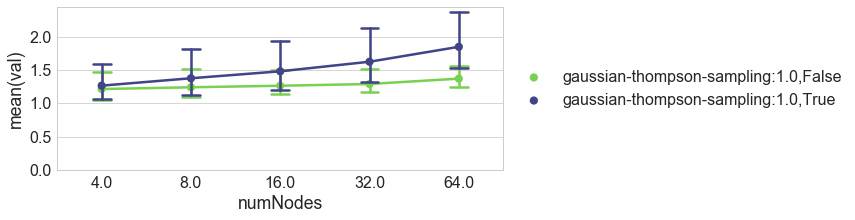

In [293]:
import numpy as np
df = bandit_rewards.copy()
df = df[df['partition_id'] >= 0]
df = df[df['numParts'] > 8]
df['time_in_sec'] = (df['system_nano_end_time'] - df['system_nano_start_time']) / 1e9
df = df[['numParts', 'policy', 'disableMulticore', 'patches', 'time_in_sec']]
df = df.groupby(['numParts', 'policy', 'disableMulticore', 'patches'], as_index=False).agg(np.sum)
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 4
#df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df['oracle_min'] = df[['patches',  'numNodes', 'time_in_sec']].groupby(['patches',  'numNodes']).transform('min')

#df['val'] = (df['time_in_sec']) / df['oracle_min']


df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['patches'] = df['patches'].astype(str)


#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['patches', 'time_in_sec']].groupby(['patches'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['time_in_sec']
df_grouped['patches'] = df_grouped['patches'].astype(str)
df_joined = pd.merge(df, df_grouped[['patches', 'oracle_min']], on=['patches'])
df_joined['val'] = (df_joined['time_in_sec']) / df_joined['oracle_min']


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df_joined = df_joined[df_joined['policy2'].isin(['gaussian-thompson-sampling:1.0,False', 'gaussian-thompson-sampling:1.0,True'])]



import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

sns.set_palette(matplotlib_palette(n_colors=2, name='viridis', light=0.8, dark=0.2)) # This is a colorblind-safe palette (for 3 colors)



sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])

ax = sns.pointplot(data = df_joined, x='numNodes', hue='policy2', y='val', capsize=0.2, ci=100)
leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
sns.plt.ylim(0,)
plt.show()
#display(df)
#display(df_grouped)
#display(df_joined)

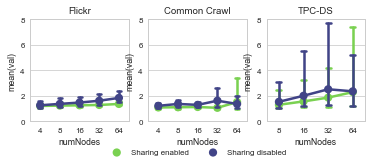

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0)

sns.set_palette(matplotlib_palette(n_colors=2, name='viridis', light=0.8, dark=0.2)) # This is a colorblind-safe palette (for 3 colors)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(6, 1.875))


###
### Flickr
###

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-scaling-all/flickr-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)

import numpy as np
df = bandit_rewards.copy()
df = df[df['partition_id'] >= 0]
df = df[df['numParts'] > 8]
df['time_in_sec'] = (df['system_nano_end_time'] - df['system_nano_start_time']) / 1e9
df = df[['numParts', 'policy', 'disableMulticore', 'patches', 'time_in_sec']]
df = df.groupby(['numParts', 'policy', 'disableMulticore', 'patches'], as_index=False).agg(np.sum)
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 4
#df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df['oracle_min'] = df[['patches',  'numNodes', 'time_in_sec']].groupby(['patches',  'numNodes']).transform('min')

#df['val'] = (df['time_in_sec']) / df['oracle_min']


df =  df[['patches', 'policy2', 'numNodes', 'time_in_sec']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['patches'] = df['patches'].astype(str)


#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['patches', 'time_in_sec']].groupby(['patches'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['time_in_sec']
df_grouped['patches'] = df_grouped['patches'].astype(str)
df_joined = pd.merge(df, df_grouped[['patches', 'oracle_min']], on=['patches'])
df_joined['val'] = (df_joined['time_in_sec']) / df_joined['oracle_min']


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df_joined = df_joined[df_joined['policy2'].isin(['gaussian-thompson-sampling:1.0,False', 'gaussian-thompson-sampling:1.0,True'])]



#sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])
names = {'gaussian-thompson-sampling:1.0,False': 'Sharing enabled', 'gaussian-thompson-sampling:1.0,True': 'Sharing disabled'}
df_joined = df_joined.replace({'policy2': names})
df_joined['numNodes'] = df_joined['numNodes'].astype(int)

sns.pointplot(data = df_joined, x='numNodes', hue='policy2', y='val', capsize=0.2, ci=100, ax=ax1)
#display(df)
#display(df_grouped)
#display(df_joined)

###
### Common Crawl REGEx
###
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl-scaling/commoncrawl-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] != 4]

#df = df[df['policy'] == 'constant:0']

df['globalTime'] = df['globalTime']/1e3
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)
#df2 = df2[df2['policy'] == 'gaussian-thompson-sampling:1.0']

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 16
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle_min'] = df[['regex',  'numNodes', 'globalTime']].groupby(['regex',  'numNodes']).transform('min')

df['val'] = (df['globalTime']) / df['oracle_min']

'''
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['globalTime']
df = df.join(df_grouped[['regex', 'oracle_min']], on=['regex'], how='inner', rsuffix='_r')
#df['oracle_min'] = df['oracle_min'] * 4 / df['numNodes']

df['val'] = (df['globalTime']) / df['oracle_min']'''

#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df = df[df['policy2'].str.startswith('gaussian')]


#sns.plt.figure(figsize=(4, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])
names = {'gaussian-thompson-sampling:1.0,False': 'Sharing enabled', 'gaussian-thompson-sampling:1.0,True': 'Sharing disabled'}
df = df.replace({'policy2': names})

df['numNodes'] = df['numNodes'].astype(int)

sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', capsize=0.2, ci=100, ax=ax2)
#sns.plt.ylim(0,)
#ax.set_xscale('log', basex=2)

###
### TPC-DS
###

bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/tpcds-scaling/tpcds-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df.sort_values('numNodes')
df = df[df['numNodes'] > 4]
df = df[df['index'] > 0]


#df = df[df['policy'] == 'constant:0']
df["py2"] = df["spark.sql.join.bandit.shuffleSortHash"] + ',' + df["spark.sql.join.banditJoin"].map(str) + ',' + df["disableMulticore"].map(str)
df =  df[['query', 'py2', 'numNodes', 'totalExecutorJoinTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df = df[df['py2'] != 'both,False,False']
df['oracle_max'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('max')
df['oracle_min'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('min')

df['val'] = (df['totalExecutorJoinTime']) / df['oracle_min']


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
df = df[df['py2'] != 'hash,True,False']
df = df[df['py2'] != 'sort,True,False']
names = {'both,True,False': 'Sharing enabled', 'both,True,True': 'Sharing disabled'}
name_order = ['Sharing enabled', 'Sharing disabled']
df = df.replace({'py2': names})


#df = df[df['query'] != 'q72']

#sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])

sns.pointplot(data = df, x='numNodes', hue='py2', y='val', capsize=0.2, ci=100, ax=ax3, hue_order=name_order)

# Remove undesired legends
ax1.legend_.remove()
ax3.legend_.remove()
leg = ax2.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)

ax1.set_title('Flickr')
ax2.set_title('Common Crawl')
ax3.set_title('TPC-DS')

ax1.set_ylim(0,8)
ax2.set_ylim(0,8)
ax3.set_ylim(0,8)

plt.savefig('scaling-all.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()


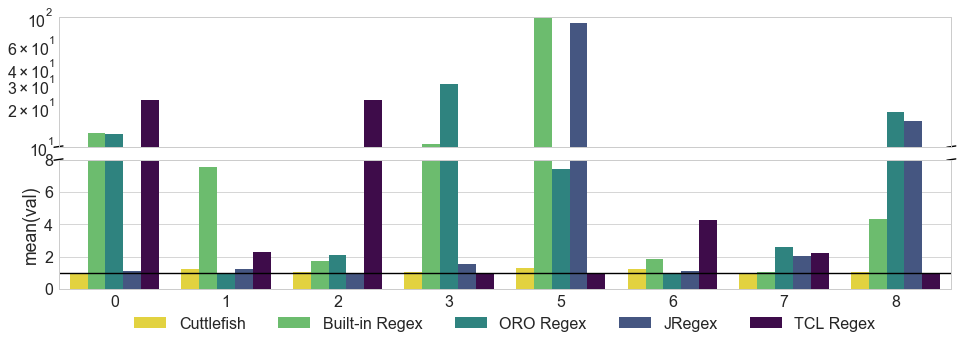

In [295]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl-scaling/commoncrawl-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] != 4]

#df = df[df['policy'] == 'constant:0']

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

sns.set_palette(matplotlib_palette(n_colors=5, name='viridis', light=1.0, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)


#plt.figure(figsize=(8, 3))



df['globalTime'] = df['globalTime']/1e3
df = df[df['numParts'] == 8*16]
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)
#g = sns.FacetGrid(df, col="query", col_wrap=8, sharey=True, aspect=0.5)
#g.map(sns.barplot, 'policy2', 'totalExecutorJoinTime').set_titles("{col_name}")
#sns.barplot(data=df, x='policy2', y='totalExecutorJoinTime')
#df

df =  df[['regex', 'policy2', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['regex', 'globalTime']].groupby('regex').transform('min')
df['val'] = df['globalTime'] / df['oracle']
df = df[df['policy2'] != 'gaussian-thompson-sampling:1.0,True']

names = {'constant:0,False': 'TCL Regex', 'constant:1,False': 'JRegex', 'constant:2,False': 'ORO Regex', 'constant:3,False': 'Built-in Regex', 'gaussian-thompson-sampling:1.0,False': 'Cuttlefish'}
name_order = ['Cuttlefish', 'Built-in Regex', 'ORO Regex', 'JRegex', 'TCL Regex']
df = df.replace({'policy2': names})


#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 5))

sns.barplot(data=df, x='regex', hue='policy2', hue_order=name_order, y='val', ax=ax)
sns.barplot(data=df, x='regex', hue='policy2', hue_order=name_order, y='val', ax=ax2)

ax2.hlines([1.0], -1000, 1000)
ax.set_ylim(10,100)
ax.legend_.remove()

ax.set_yscale('log', basey=10)

ax2.set_ylim(0,8)
#ax2.set_yscale('log', basey=10)

#ax.spines['bottom'].set_visible(False)
#ax2.spines['top'].set_visible(False)
ax.get_xaxis().set_visible(False)

ax.get_yaxis().label.set_visible(False)
ax2.get_xaxis().label.set_visible(False)



#ax.get_yaxis().set_visible(False)







# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.subplots_adjust(hspace=.1)

leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)

#df.plot.bar()
#plt.show()
plt.savefig('regex_8node.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()



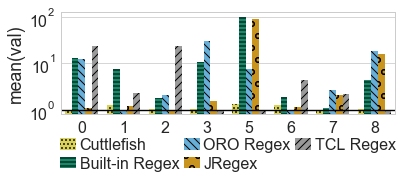

In [296]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl-scaling/commoncrawl-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] != 4]

#df = df[df['policy'] == 'constant:0']

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)


#plt.figure(figsize=(8, 3))



df['globalTime'] = df['globalTime']/1e3
df = df[df['numParts'] == 8*16]
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)
#g = sns.FacetGrid(df, col="query", col_wrap=8, sharey=True, aspect=0.5)
#g.map(sns.barplot, 'policy2', 'totalExecutorJoinTime').set_titles("{col_name}")
#sns.barplot(data=df, x='policy2', y='totalExecutorJoinTime')
#df

df =  df[['regex', 'policy2', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle'] = df[['regex', 'globalTime']].groupby('regex').transform('min')
df['val'] = df['globalTime'] / df['oracle']
df = df[df['policy2'] != 'gaussian-thompson-sampling:1.0,True']

names = {'constant:0,False': 'TCL Regex', 'constant:1,False': 'JRegex', 'constant:2,False': 'ORO Regex', 'constant:3,False': 'Built-in Regex', 'gaussian-thompson-sampling:1.0,False': 'Cuttlefish'}
name_order = ['Cuttlefish', 'Built-in Regex', 'ORO Regex', 'JRegex', 'TCL Regex']
df = df.replace({'policy2': names})

#plt.figure(figsize=(16, 3))
#sns.plt.ylim(0,14)
#ax = sns.barplot(data=df, x='regex', hue='policy2', y='val')

#plt.figure(figsize=(20, 1.0))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(6, 1.875))

sns.barplot(data=df, x='regex', hue='policy2', hue_order=name_order, y='val', ax=ax)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o', '///'])
num_queries = len(df['regex'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

ax.hlines([1.0], -1000, 1000)
ax.set_yscale('log', basey=10)
ax.get_xaxis().label.set_visible(False)


leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15), ncol=3, columnspacing=0.3, labelspacing=0.2, borderpad=False, handlelength=1.0, handletextpad=0.2)

#df.plot.bar()
#plt.show()
plt.savefig('regex_8node.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()




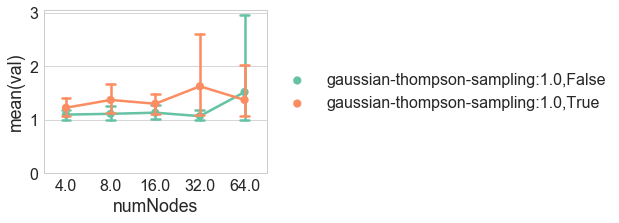

In [105]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/commoncrawl-scaling/commoncrawl-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['globalTime'] > 0]
df = df[df['regex'] != 4]

#df = df[df['policy'] == 'constant:0']

df['globalTime'] = df['globalTime']/1e3
df["policy2"] = df["policy"] + ',' + df["disableMulticore"].map(str)
#df2 = df2[df2['policy'] == 'gaussian-thompson-sampling:1.0']
'''VegaLite({
  "mark": "line",
  "encoding": {
    "y": {"type": "quantitative","field": "globalTime"},
    "x": {"type": "nominal","field": "numParts"},

    "color": {"type": "nominal","field": "policy2"},

    #"column": {"type": "quantitative", "field": "numParts"},
      "detail": {"field": "regex", "type": 'nominal'}
  }
}, df2)'''

#df = df[df['policy'] == 'constant:0']
df['numNodes'] = df['numParts'] / 16
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df['oracle_min'] = df[['regex',  'numNodes', 'globalTime']].groupby(['regex',  'numNodes']).transform('min')

df['val'] = (df['globalTime']) / df['oracle_min']

'''
df =  df[['regex', 'policy2', 'numNodes', 'globalTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex']).agg('max')
df_grouped = df[df['numNodes'] == 4][['regex', 'globalTime']].groupby(['regex'], as_index=False).agg('min')
df_grouped['oracle_min'] = df_grouped['globalTime']
df = df.join(df_grouped[['regex', 'oracle_min']], on=['regex'], how='inner', rsuffix='_r')
#df['oracle_min'] = df['oracle_min'] * 4 / df['numNodes']

df['val'] = (df['globalTime']) / df['oracle_min']'''

#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
#df = df[df['py2'] != 'hash,True,False']
#df = df[df['py2'] != 'sort,True,False']

#df = df[df['regex'] != 3]
df = df[df['policy2'].str.startswith('gaussian')]



import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

sns.set_palette(sns.color_palette("Set2")) # This is a colorblind-safe palette (for 3 colors)

sns.plt.figure(figsize=(4, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])

ax = sns.pointplot(data = df, x='numNodes', hue='policy2', y='val', capsize=0.2, ci=100)
leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
sns.plt.ylim(0,)
plt.show()
#ax.set_xscale('log', basex=2)

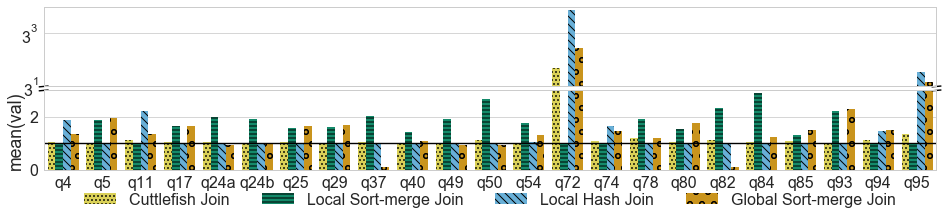

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
Query &   q11 &   q17 &  q24a &  q24b &   q25 &   q29 &  q37 &    q4 &  q40 &  q49 &   q5 &   q50 &  q54 &    q72 &   q74 &   q78 &   q80 &  q82 &  q84 &  q85 &   q93 &   q94 &   q95 \\
Join Type              &       &       &       &       &       &       &      &       &      &      &      &       &      &        &       &       &       &      &      &      &       &       &       \\
\midrule
Cuttlefish Join        &  1297 &   889 &  1070 &  1070 &   944 &   886 &  140 &  2021 &  298 &  239 &  155 &   480 &  315 &   1951 &  1204 &  1670 &  1395 &  262 &   27 &  280 &   564 &  1620 &  1542 \\
Global Sort-merge Join &  1515 &  1408 &   977 &  1032 &  1491 &  1463 &   14 &  2612 &  320 &  220 &  304 &   401 &  415 &   4538 &  1612 &  1692 &  2290 &   27 &   32 &  393 &  1279 &  2146 &  4013 \\
Local Hash Join        &  2520 &   849 &  1024 &  1061 &   906 &   865 &  133 &  3613 &  290 &  232 &  158 &   426 &  334 &  22118 &  1810 &  139

In [286]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/tpcds-scaling/tpcds-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['numNodes'] > 4]
df = df[df['index'] > 0]

#df = df[df['policy'] == 'constant:0']

'''
df2 = df.copy()
df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3
df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str)
VegaLite({
  "mark": "bar",
  "encoding": {
    "y": {"type": "quantitative","field": "totalExecutorJoinTime"},
    "x": {"type": "nominal","field": "policy2"},

    "color": {"type": "nominal","field": "policy2"},

    "row": {"type": "quantitative", "field": "numNodes"},
     "column": {"field": "query", "type": 'nominal'}
  }
}, df2)
'''

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

# Colors sourced from: http://jfly.iam.u-tokyo.ac.jp/color/
# and from: http://www.cookbook-r.com/Graphs/Colors_%28ggplot2%29/
# Black, orange, sky blue, bluish green, yellow, blue, vermilion
#colors = ['#000000', '#e69f00', '#56b4e9', '#009e73', '#f0e442', '#0072b2', '#d55e00'][::-1]

colors = ['#f0e442', '#009e73', '#56b4e9', '#e69f00', '#999999', '#d55e00', '#000000', '#0072b2']

sns.set_palette(colors)#matplotlib_palette(n_colors=5, name='plasma', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)
#sns.set_palette(matplotlib_palette(n_colors=4, name='viridis', light=1.2, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)

#plt.figure(figsize=(8, 3))



df['totalExecutorJoinTime'] = df['totalExecutorJoinTime']/1e3
df = df[df['numNodes'] == 8]
df["policy2"] = df["spark.sql.join.bandit.shuffleSortHash"] + ',' + df["spark.sql.join.banditJoin"].map(str) + ',' + df["disableMulticore"].map(str)
#g = sns.FacetGrid(df, col="query", col_wrap=8, sharey=True, aspect=0.5)
#g.map(sns.barplot, 'policy2', 'totalExecutorJoinTime').set_titles("{col_name}")
#sns.barplot(data=df, x='policy2', y='totalExecutorJoinTime')
#df

df_grouped = df[df['policy2'] != 'both,False,False'][['query', 'totalExecutorJoinTime']].groupby(['query'], as_index=False).agg('min')
df_grouped['oracle'] = df_grouped['totalExecutorJoinTime']
df = pd.merge(df, df_grouped[['query', 'oracle']], on=['query'])

df =  df[df['policy2'] != 'both,True,True']
#df =  df[df['policy2'] != 'both,False,False'][df['policy2'] != 'both,True,True'][['query', 'policy2', 'totalExecutorJoinTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df['oracle'] = df[['query', 'totalExecutorJoinTime']].groupby('query').transform('min')
df['val'] = df['totalExecutorJoinTime'] / df['oracle']

names = {'both,True,False': 'Cuttlefish Join', 'hash,True,False': 'Local Hash Join', 'sort,True,False': 'Local Sort-merge Join', 'both,False,False': 'Global Sort-merge Join'}
name_order = ['Sharing enabled', 'Sharing disabled']
df = df.replace({'policy2': names})


#plt.figure(figsize=(20, 0.5))
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 3))

sns.barplot(data=df, x='query', hue='policy2', y='val', ax=ax)
sns.barplot(data=df, x='query', hue='policy2', y='val', ax=ax2)

# Set hatches
import itertools
hatches = itertools.cycle(['...', '---', '\\\\\\', 'o'])

num_queries = len(df['query'].unique())
for i, bar in enumerate(ax.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
for i, bar in enumerate(ax2.patches):
    if i % num_queries == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)


ax2.hlines([1.0], -1000, 1000)
ax.set_ylim(3,81)
ax.legend_.remove()

ax.set_yscale('log', basey=3)
ax2.set_ylim(0,3)
#ax2.set_yscale('log', basey=3)

#ax.spines['bottom'].set_visible(False)
#ax2.spines['top'].set_visible(False)
ax.get_xaxis().set_visible(False)

ax.get_yaxis().label.set_visible(False)
ax2.get_xaxis().label.set_visible(False)



#ax.get_yaxis().set_visible(False)







# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.subplots_adjust(hspace=.05)

leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=4)

#df.plot.bar()
#plt.show()
plt.savefig('tpcds_8node.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

df['Join Type'] = df['policy2']
df['Query'] = df['query']
df['Total Join Time (s)'] = df['totalExecutorJoinTime'].astype(int)
print df.pivot(index='Join Type', columns='Query', values='Total Join Time (s)').to_latex()


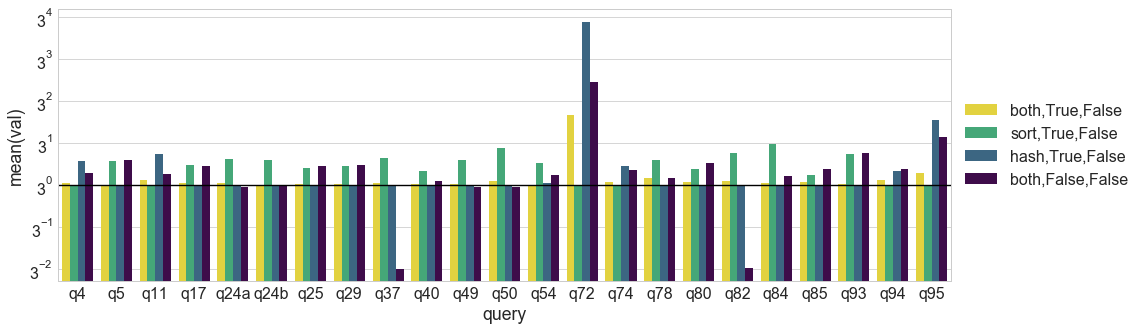

In [84]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/tpcds-scaling/tpcds-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df[df['numNodes'] > 4]
df = df[df['index'] > 0]

#df = df[df['policy'] == 'constant:0']

'''
df2 = df.copy()
df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3
df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str)
VegaLite({
  "mark": "bar",
  "encoding": {
    "y": {"type": "quantitative","field": "totalExecutorJoinTime"},
    "x": {"type": "nominal","field": "policy2"},

    "color": {"type": "nominal","field": "policy2"},

    "row": {"type": "quantitative", "field": "numNodes"},
     "column": {"field": "query", "type": 'nominal'}
  }
}, df2)
'''

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

sns.set_palette(matplotlib_palette(n_colors=4, name='viridis', light=1.0, dark=0.0)) # This is a colorblind-safe palette (for 3 colors)

#plt.figure(figsize=(8, 3))



df['totalExecutorJoinTime'] = df['totalExecutorJoinTime']/1e3
df = df[df['numNodes'] == 8]
df["policy2"] = df["spark.sql.join.bandit.shuffleSortHash"] + ',' + df["spark.sql.join.banditJoin"].map(str) + ',' + df["disableMulticore"].map(str)
#g = sns.FacetGrid(df, col="query", col_wrap=8, sharey=True, aspect=0.5)
#g.map(sns.barplot, 'policy2', 'totalExecutorJoinTime').set_titles("{col_name}")
#sns.barplot(data=df, x='policy2', y='totalExecutorJoinTime')
#df

df_grouped = df[df['policy2'] != 'both,False,False'][['query', 'totalExecutorJoinTime']].groupby(['query'], as_index=False).agg('min')
df_grouped['oracle'] = df_grouped['totalExecutorJoinTime']
df = pd.merge(df, df_grouped[['query', 'oracle']], on=['query'])

df =  df[df['policy2'] != 'both,True,True']
#df =  df[df['policy2'] != 'both,False,False'][df['policy2'] != 'both,True,True'][['query', 'policy2', 'totalExecutorJoinTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
#df['oracle'] = df[['query', 'totalExecutorJoinTime']].groupby('query').transform('min')
df['val'] = df['totalExecutorJoinTime'] / df['oracle']

plt.figure(figsize=(20, 0.5))
f, (ax) = plt.subplots(1, 1, sharex=True, figsize=(16, 5))

sns.barplot(data=df, x='query', hue='policy2', y='val', ax=ax)

ax.hlines([1.0], -1000, 1000)
#ax.set_ylim(3,81)
#ax.legend_.remove()

ax.set_yscale('log', basey=3)
#ax2.set_ylim(0,3)
#ax2.set_yscale('log', basey=3)

#ax.spines['bottom'].set_visible(False)
#ax2.spines['top'].set_visible(False)
#ax.get_xaxis().set_visible(False)

#ax.get_yaxis().label.set_visible(False)
#ax2.get_xaxis().label.set_visible(False)



#ax.get_yaxis().set_visible(False)

leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#df.plot.bar()
#plt.show()
plt.savefig('tpcds_8node.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()



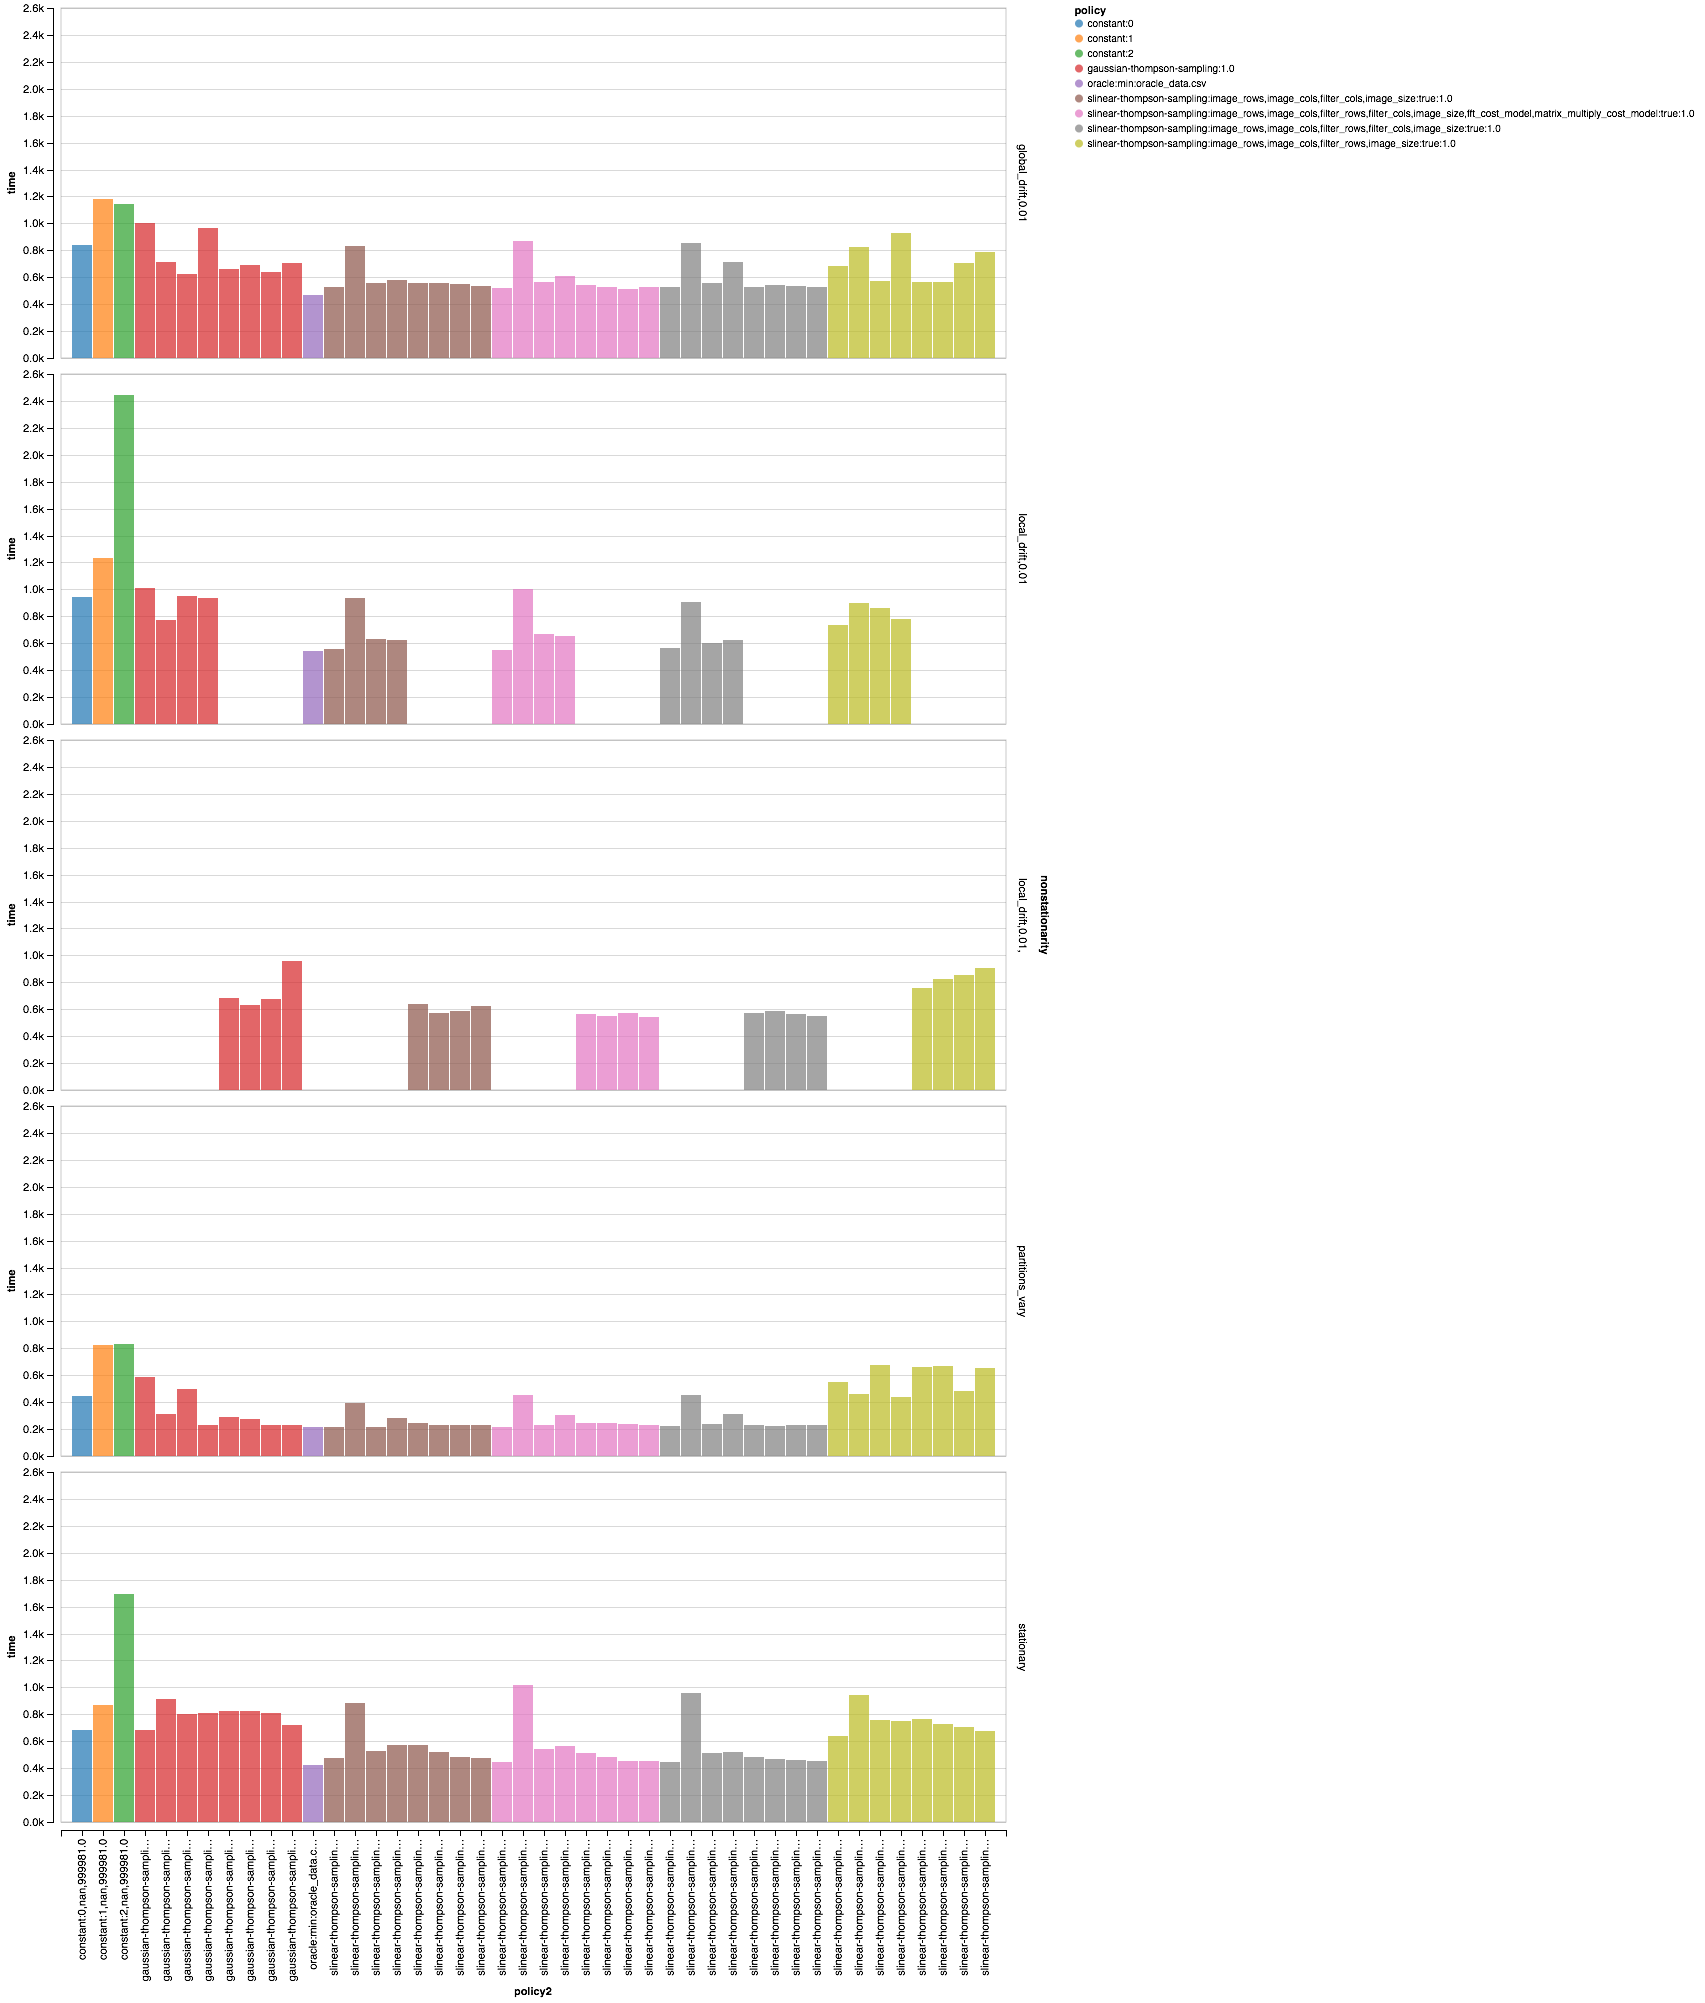

In [73]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary/flickr-nonstationary-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards.copy()
df = df[df['partition_id'] == -1]
#df = df[df['policy'] == 'constant:0']


df['time'] = df['globalTime']/1e3
df["policy2"] = df["policy"] + ',' + df['tag'].map(str) + ',' + df['clusterCoefficient'].map(str)
VegaLite({
  "mark": "bar",
  "encoding": {
    "y": {"type": "quantitative","field": "time"},
    "x": {"type": "nominal","field": "policy2"},

    "color": {"type": "nominal","field": "policy"},

      "row": {"type": "nominal", "field": "nonstationarity"}

  }
}, df)





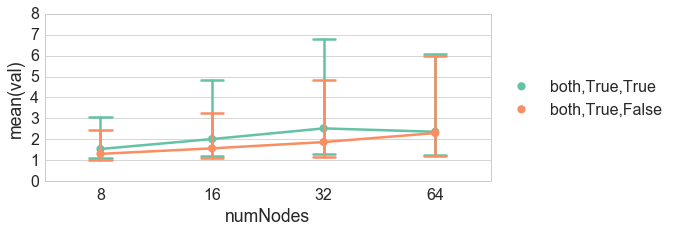

In [112]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/tpcds-scaling/tpcds-scaling-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards
df = df.sort_values('numNodes')
df = df[df['numNodes'] > 4]
df = df[df['index'] > 0]


#df = df[df['policy'] == 'constant:0']
df["py2"] = df["spark.sql.join.bandit.shuffleSortHash"] + ',' + df["spark.sql.join.banditJoin"].map(str) + ',' + df["disableMulticore"].map(str)
df =  df[['query', 'py2', 'numNodes', 'totalExecutorJoinTime']]#.pivot(index='query', columns='policy2', values='totalExecutorJoinTime')
df = df[df['py2'] != 'both,False,False']
df['oracle_max'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('max')
df['oracle_min'] = df[['query',  'numNodes', 'totalExecutorJoinTime']].groupby(['query',  'numNodes']).transform('min')

df['val'] = (df['totalExecutorJoinTime']) / df['oracle_min']


#df2 = df.copy()
#df2['totalExecutorJoinTime'] = df2['totalExecutorJoinTime']/1e3


#df2["policy2"] = df2["policy"] + ',' + df2["disableMulticore"].map(str) + ',' + df2["query"].map(str)
'''VegaLite({
  "mark": "line",
  "encoding": {
    "y": {"aggregate": "mean", "type": "quantitative","field": "val"},
      "color": {"type": "nominal", "field": "py2"},
      #"column": {"type": 'nominal', 'field': 'query'},

    "x": {"type": "nominal", "field": "numNodes"}
  }
}, df)
'''
df = df[df['py2'] != 'hash,True,False']
df = df[df['py2'] != 'sort,True,False']

#df = df[df['query'] != 'q72']



import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0)

sns.set_palette(sns.color_palette("Set2")) # This is a colorblind-safe palette (for 3 colors)

sns.plt.figure(figsize=(8, 3))
#sns.pointplot(data = df, x='numNodes', y='val', hue='py2')
#ax = sns.tsplot(data = df, unit='query', time='numNodes', condition='py2', value='val', err_style='ci_band', ci=[67, 100])

ax = sns.pointplot(data = df, x='numNodes', hue='py2', y='val', capsize=0.2, ci=100)
leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
sns.plt.ylim(0,)
plt.show()
#ax.set_xscale('log', basex=2)


In [79]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary/flickr-nonstationary-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)
df = bandit_rewards.copy()
df = df[df['partition_id'] > -1]

import numpy as np
df['time_in_sec'] = (df['system_nano_end_time'] - df['system_nano_start_time']) / 1e9
df = df[['policy', 'tag', 'clusterCoefficient', 'nonstationarity', 'time_in_sec']]

#df = df[df['policy'] == "constant:0"]

#df = df[df['policy'] == 'constant:0']

df = df.groupby(['policy', 'tag', 'clusterCoefficient', 'nonstationarity']).describe()
df

,partition_id,pos_in_partition,canonical_tuple_id,img_x_dim,img_y_dim,filter_rows,filter_cols,system_nano_start_time,system_nano_end_time,arm,...,crops,patches,driftRate,driftCoefficient,clusterCoefficient,communicationRate,disableMulticore,numParts,globalTime,tag
0,0,0,32_0,250,167,3,75,165034635833832,165034670515328,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
1,0,1,64_0,185,250,3,75,165034670868891,165034704174540,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
2,0,2,96_0,250,166,3,75,165034704259099,165035107240544,2,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
3,0,3,128_0,187,250,3,75,165035107340452,165035160239365,1,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
4,0,4,160_0,187,250,3,75,165035160335914,165035444709053,2,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
5,0,5,192_0,156,250,3,75,165035444774554,165035487984888,1,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
6,0,6,224_0,187,250,3,75,165035488121339,165035521076561,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
7,0,7,256_0,166,250,3,75,165035521146047,165035548164219,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
8,0,8,288_0,187,250,3,75,165035548242321,165035577345092,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart
9,0,9,320_0,187,250,3,75,165035577431052,165035606628198,0,...,"0,0,0.5,0.5","5,3:5,20:8,30:20,5:30,8:25,5:5,25:3,5",15s,0.25,0.25,500ms,False,32,0,shareSmart


In [5]:
bandit_file = "/Users/tomerk11/Development/keystone-example/experiment-results/flickr-nonstationary/flickr-nonstationary-all.csv"

## Plot the current policy
bandit_rewards = pd.read_csv(bandit_file)



/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:45: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()


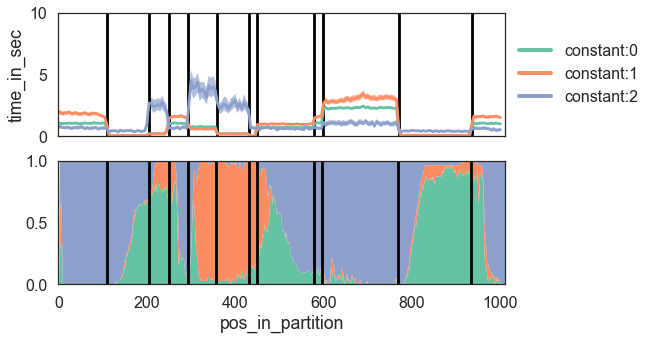

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("white")
sns.set_context("poster", font_scale=1.0)

#plt.viridis()
#sns.set_palette(matplotlib_palette(n_colors=3, name='cubehelix', reverse=True, light=0.8, dark=0.2)) # This is a colorblind-safe palette (for 3 colors)
sns.set_palette(sns.color_palette("Set2", 3))

plt.figure(figsize=(8, 3))

nonstationarity = 'global_drift,0.01'
df2 = bandit_rewards.copy()
df2 = df2[df2['partition_id'] > -1]
df2 = df2[df2['policy'] == "gaussian-thompson-sampling:1.0"]
df2 = df2[df2['tag'] == 'shareSmart']
df2 = df2[df2['clusterCoefficient'] == 1]
df2 = df2[df2['nonstationarity'] == nonstationarity]


df3 = bandit_rewards.copy()
df3 = df3[df3['partition_id'] > -1]

#df3 = df3[df3['pos_in_partition'] < 600]

df3 = df3[df3['nonstationarity'] == nonstationarity]
df3 = df3[df3['policy'].str.startswith('constant')]
df3['time_in_sec'] = (df3['system_nano_end_time'] - df3['system_nano_start_time']) / 1e9
df3 = df3[['partition_id', 'pos_in_partition', 'time_in_sec', 'policy']]
window_size = 5
df3['partition_id'] = (df3['pos_in_partition'] % window_size) + df3['partition_id'] * window_size
df3['pos_in_partition'] = (df3['pos_in_partition'] / window_size).astype(int) * window_size

#df3 = df3.groupby(['pos_in_partition', 'policy'], as_index=False).agg(np.mean)
#df3 = df3.pivot(index='pos_in_partition', columns='policy', values='time_in_sec')
#df3 = df3[df3.columns.tolist()[::-1]]

df2 = df2[['pos_in_partition', 'arm']]#df2[['policy', 'tag', 'clusterCoefficient', 'pos_in_partition', 'arm', 'nonstationarity']]
df2['count'] = 1
df2 = df2.groupby(['pos_in_partition', 'arm'], as_index=False).agg(np.sum)
df2 = df2.pivot(index='pos_in_partition', columns='arm', values='count').fillna(0)
df2 = df2.div(df2.sum(axis=1), axis=0) # Normalize the rows
df2 = pd.rolling_mean(df2, 3)

def rolling_mean(data, axis=0):
    return pd.rolling_mean(data, 1, axis=1).mean(axis=axis)

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 1)

changes=[110,205,250,293,358,431,450,578,598,770,935]
#df2.plot()
vex = plt.subplot(gs[0, 0])
vex = sns.tsplot(ax = vex, time='pos_in_partition', value='time_in_sec', unit='partition_id', err_style='ci_band', ci=[0, 0, 0, 0, 0, 100, 100, 100, 100, 100], condition='policy', data=df3)#df3.plot(figsize=(8, 3), logy=True)
#vex = sns.tsplot(ax = vex, time='pos_in_partition', value='time_in_sec', unit='partition_id', err_style=None, condition='policy', data=df3)#df3.plot(figsize=(8, 3), logy=True)

#vex.set_yscale('log')
vex.get_xaxis().set_visible(False)
vex.set_ylim(0.01,10)


vex.vlines(changes, 0.0, 10.0)
leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

vax = plt.subplot(gs[1, 0])
#vax = df2.plot(ax = vax, kind='line', figsize=(8, 5), legend=False)

vax = df2.plot(ax = vax, kind='area', figsize=(8, 5), linewidth=0, legend=False)

vax.vlines(changes, 0.0, 1.0)
vax.set_ylim(0,1)

#leg = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# set the linewidth of each legend object
#for legobj in leg.legendHandles:
#    legobj.set_linewidth(4.0)
plt.savefig('global_drift.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')
#df2[0]
#sinplot()
plt.show()

# 